# India Coronavirus(Covid-19) EDA,Visualizations and Comparisons

<a></a>
# 1. Introduction 
[](##Dataset_Imports)
<font size="2">The COVID-19 pandemic in India is part of the worldwide pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first case of COVID-19 in India, which originated from China, was reported on 30 January 2020. India currently has the largest number of confirmed cases in Asia and has the second-highest number of confirmed cases in the world after the United States,with the number of total confirmed cases breaching the 100,000 mark on 19 May,and 1,000,000 confirmed cases on 17 July 2020. On 29 August 2020, India recorded the global highest single-day spike in COVID-19 cases with 78,761 cases, surpassing the previous record of 77,368 cases recorded in the US on 17 July 2020. India currently holds the single day record for largest increase in cases, set on September 17, with an additional 97,894 and has sustained highest number of daily cases spike since then. September 25 marked 1.49 million tests in a single day; the highest in the world.</font>

![](https://drive.google.com/uc?export=download&id=1UChRA_FKLXpuu53qZsRLQFkE7indJX2H)



### This notebook aims at exploring COVID-19 situation in India through data analysis and projections.

## Covid-19 Data Sources:
* CSV Datasets [COVID19-India API](https://api.covid19india.org/documentation/csv/)
* Official Sources are [MOHFW](https://www.mohfw.gov.in/), [ICMR](https://icmr.nic.in/node/39071).
* Learn more from [World Health Organization](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)

> <font size="2">Don't PANIC, follow your nation and WHO guidelines.
> Stay safe and Healthy. Join the cause!</font>

## Feel free to drop your feedback below.Last update: 10/27/2020. Updates to the data table.



In [1]:
#Core Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Core Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
import plotly_express as px
init_notebook_mode(connected=True)
from scipy.ndimage.filters import gaussian_filter1d
import datetime
import calendar
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/districts1/district_wise.csv
/kaggle/input/statewise/states.csv
/kaggle/input/states-daily/state_wise_daily.csv


## 2. Dataset Imports
<a></a>
Download the dataset from the links provied [here](https://api.covid19india.org/documentation/csv/)
Remember you update this on a daily basis !

In [2]:
states=pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')
states_daily=pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
district_wise=pd.read_csv('https://api.covid19india.org/csv/latest/district_wise.csv')

## 3. Data Preprocessing

In [3]:
states['Date'] = pd.to_datetime(states['Date'],
                              infer_datetime_format=True)
#states.head()

states_all=np.sort(states['State'].unique())
#print(states_all)

df = pd.DataFrame(columns = ['Date', 'State', 'Confirmed', 'Recovered', 'Deceased', 'Other',
       'Tested']) 
for i in states_all:
    if(i!='India'):
        state_data=states[states['State']==i]
        state_data=state_data.groupby('Date',as_index=False).last()
        df=df.append(state_data)
        
df1=df.groupby('State',as_index=False).last()
#df1.head()

india_data=states[states['State']=='India']

india_data['Date'] = pd.to_datetime(india_data['Date'],
                              infer_datetime_format=True).dt.to_period('m')
#india_data.head()

india_data=india_data.groupby('Date',as_index=False).last()
#india_data.head()

In [4]:
def fill_active(x):
    conf=x[0]
    rec=x[1]
    dea=x[2]
    return x[0]-(x[2]+x[1])

india_data['Active']=india_data[['Confirmed','Recovered','Deceased']].apply(fill_active,axis=1)

def fill_mortality(x):
    conf=x[0]
    dea=x[1]
    return (x[1]/x[0])*100

india_data['Mortality Rate(per 100)']=india_data[['Confirmed','Deceased']].apply(fill_mortality,axis=1)    

def fill_recovery(x):
    conf=x[0]
    rec=x[1]
    return (x[1]/x[0])*100
india_data['Recovery Rate(per 100)']=india_data[['Confirmed','Recovered']].apply(fill_recovery,axis=1)

df1['Active']=df1[['Confirmed','Recovered','Deceased']].apply(fill_active,axis=1)
df1['Mortality Rate(per 100)']=df1[['Confirmed','Deceased']].apply(fill_mortality,axis=1)   
df1['Recovery Rate(per 100)']=df1[['Confirmed','Recovered']].apply(fill_recovery,axis=1)

india_data['Tested']=india_data['Tested'].fillna(0)
#india_data.head(10)

def change(x):
    return x.strftime('%b-%Y')
india_data['Date']=india_data['Date'].apply(change)
#india_data.info()

In [5]:
conf_df=states_daily[states_daily['Status']=='Confirmed']
rec_df=states_daily[states_daily['Status']=='Recovered']
dea_df=states_daily[states_daily['Status']=='Deceased']

states_daily.drop(columns=['UN','DD'],inplace=True)
df1=df1[df1['State']!='State Unassigned']

## 4. General Analysis/Plotting of the number of Confirmed Cases, Recovered Cases, Active Cases, Deaths, Mortality and Recovery Rate


> # Line Plot representation of Confirmed/Active/Recovered/Deceased Cases and Mortality/Recovery Rate

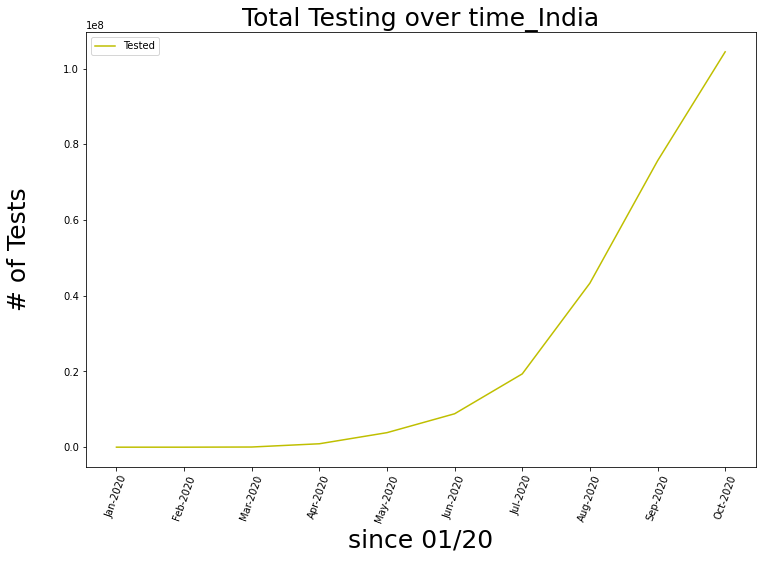

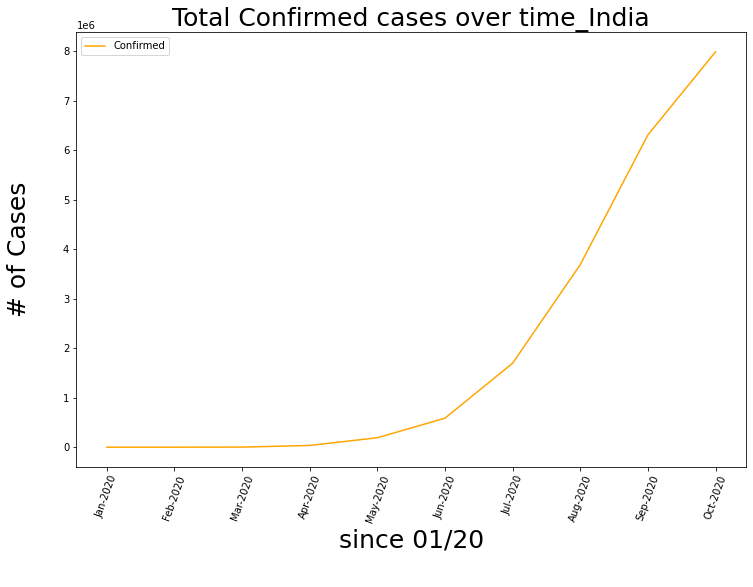

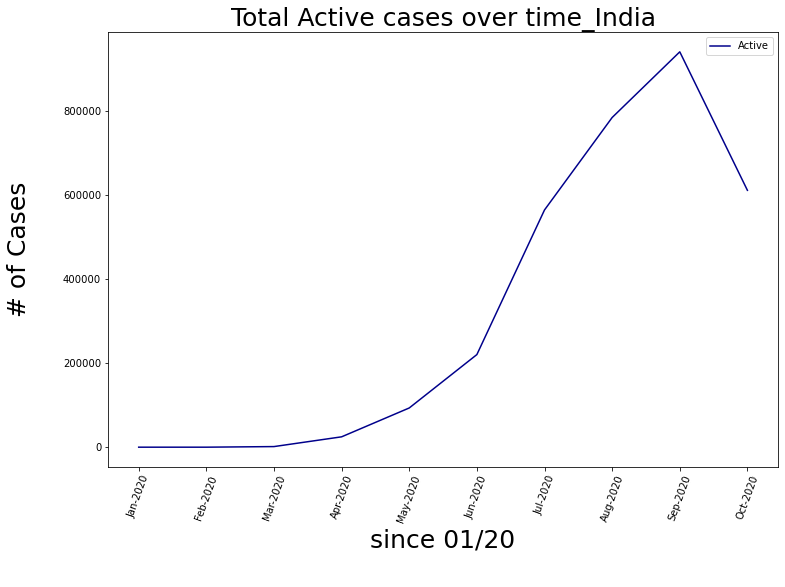

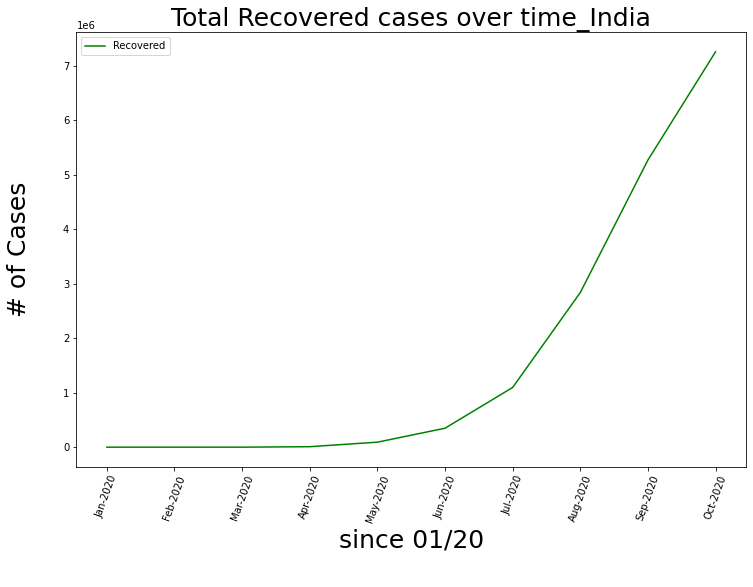

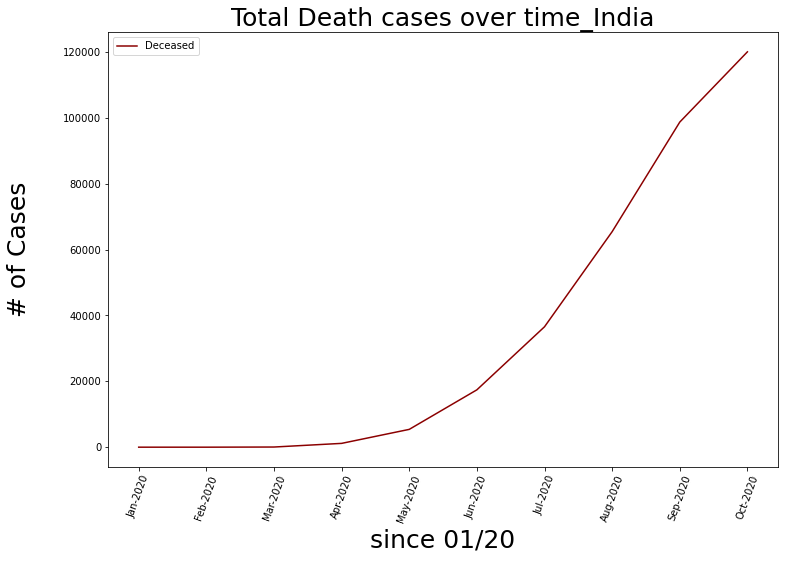

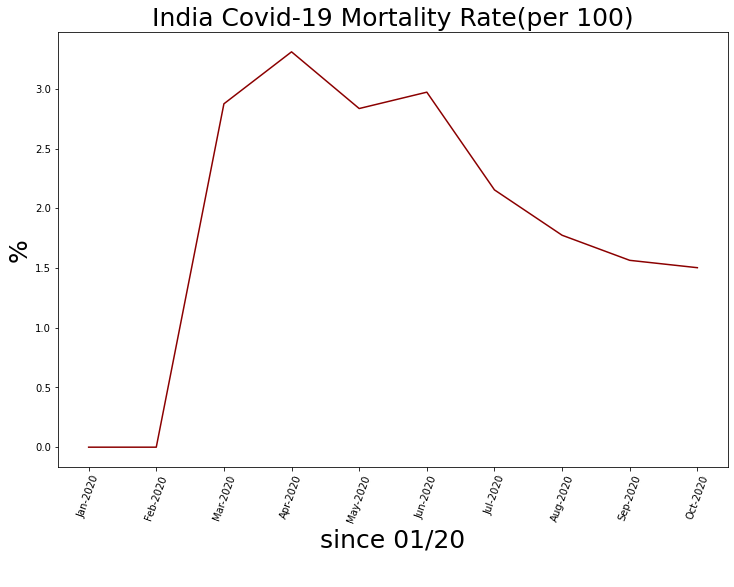

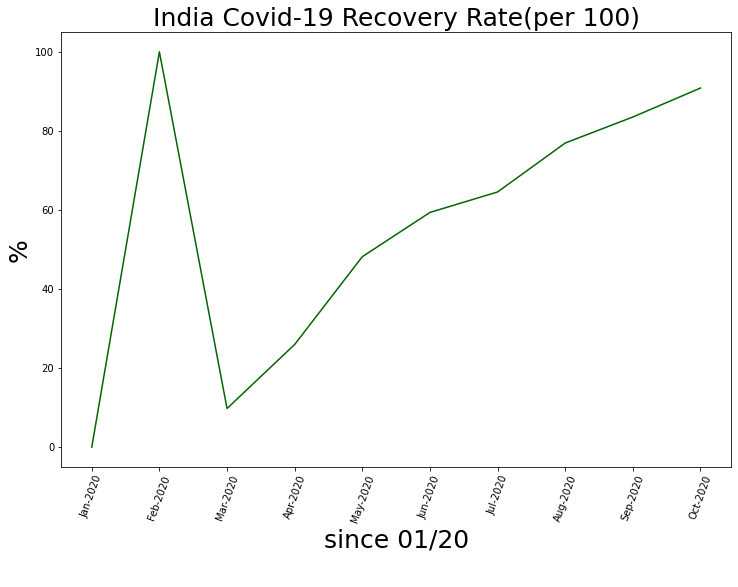

In [6]:
plt.figure(figsize=(12, 8))
fig = sns.lineplot(x="Date",y="Tested",data = india_data ,color="y",label="Tested",sort=False)
fig.set_xlabel('since 01/20\n',size=25) 
fig.set_ylabel('# of Tests\n',size=25) 
fig.set_title("Total Testing over time_India",size=25)
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)



plt.figure(figsize=(12, 8))
fig = sns.lineplot(x="Date",y="Confirmed",data = india_data ,color="orange",label="Confirmed",sort=False)
fig.set_xlabel('since 01/20\n',size=25) 
fig.set_ylabel('# of Cases\n',size=25) 
fig.set_title("Total Confirmed cases over time_India",size=25)
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)


plt.figure(figsize=(12, 8))
fig = sns.lineplot(x="Date",y="Active",data = india_data ,color="darkblue",label="Active",sort=False)
fig.set_xlabel('since 01/20\n',size=25) 
fig.set_ylabel('# of Cases\n',size=25) 
fig.set_title("Total Active cases over time_India",size=25)
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)



plt.figure(figsize=(12, 8))
fig = sns.lineplot(x="Date",y="Recovered",data = india_data ,color="green",label="Recovered",sort=False)
fig.set_xlabel('since 01/20\n',size=25) 
fig.set_ylabel('# of Cases\n',size=25) 
fig.set_title("Total Recovered cases over time_India",size=25)
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)



plt.figure(figsize=(12, 8))
fig = sns.lineplot(x="Date",y="Deceased",data = india_data ,color="darkred",label="Deceased",sort=False)
fig.set_xlabel('since 01/20\n',size=25) 
fig.set_ylabel('# of Cases\n',size=25) 
fig.set_title("Total Death cases over time_India",size=25)
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)

plt.figure(figsize=(12, 8))

fig=sns.lineplot(x='Date',y='Mortality Rate(per 100)',data=india_data,sort=False,color="darkred")
fig.set_ylabel('%',size=25) 
fig.set_xlabel('since 01/20\n',size=25) 
fig.set_title("India Covid-19 Mortality Rate(per 100)",size=25)
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)

plt.figure(figsize=(12, 8))

fig=sns.lineplot(x='Date',y='Recovery Rate(per 100)',data=india_data,sort=False,color="darkgreen")
fig.set_ylabel('%',size=25) 
fig.set_xlabel('since 01/20\n',size=25) 
fig.set_title("India Covid-19 Recovery Rate(per 100)",size=25)
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)
plt.show()

> # Graphing Daily-Increases

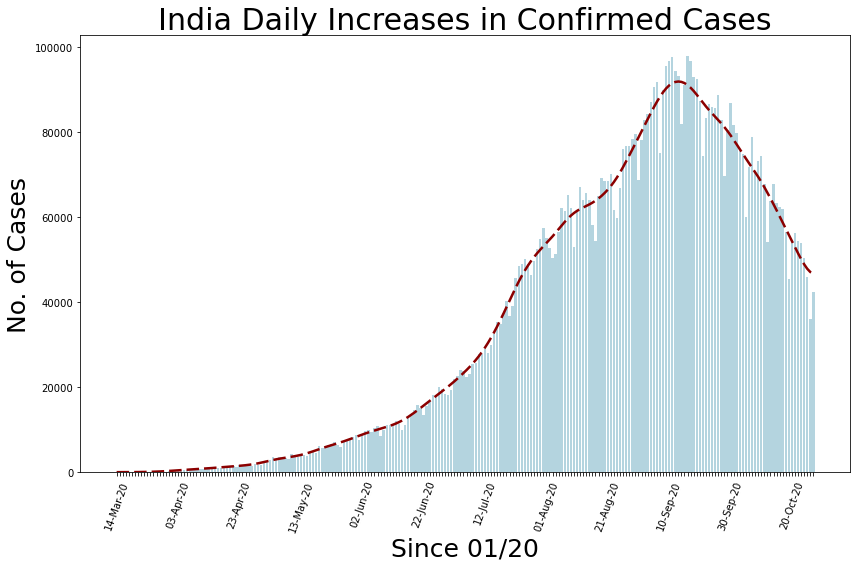

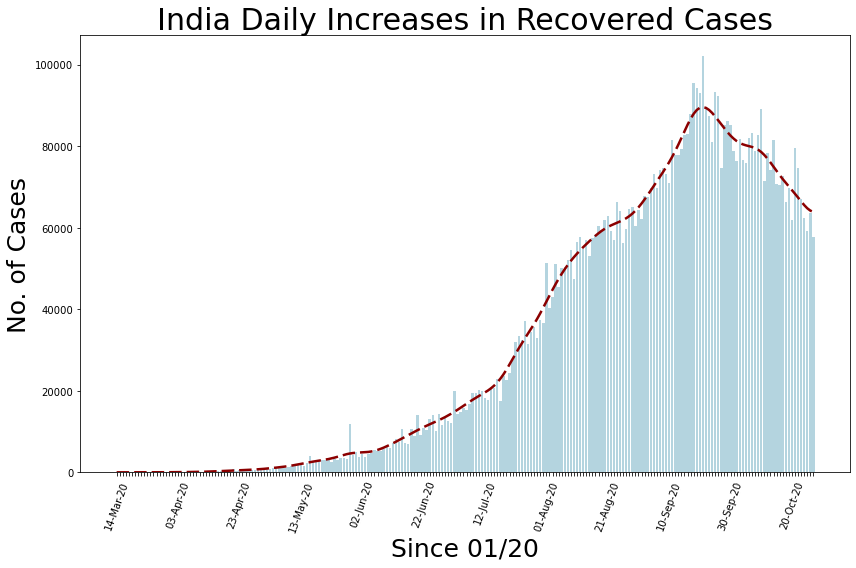

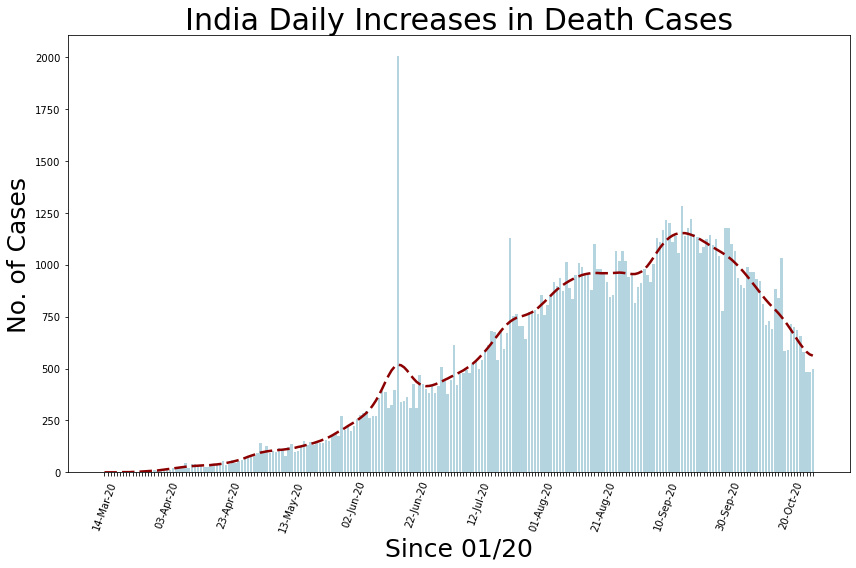

In [7]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Date',y='TT',data=conf_df,color='lightblue')
ysmoothed = gaussian_filter1d(conf_df['TT'], sigma=4)
plt.plot(conf_df['Date'], ysmoothed,linestyle='dashed',color='darkred',dashes=(5,2),lw=2.5)
every_nth = 20
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.title('India Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Since 01/20', size=25)
plt.ylabel('No. of Cases', size=25)
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)
plt.tight_layout()
plt.show()

plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Date',y='TT',data=rec_df,color='lightblue')
ysmoothed = gaussian_filter1d(rec_df['TT'], sigma=4)
plt.plot(rec_df['Date'], ysmoothed,linestyle='dashed',color='darkred',dashes=(5,2),lw=2.5)
every_nth = 20
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.title('India Daily Increases in Recovered Cases', size=30)
plt.xlabel('Since 01/20', size=25)
plt.ylabel('No. of Cases', size=25)
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)
plt.tight_layout()
plt.show()

plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Date',y='TT',data=dea_df,color='lightblue')
ysmoothed = gaussian_filter1d(dea_df['TT'], sigma=4)
plt.plot(dea_df['Date'], ysmoothed,linestyle='dashed',color='darkred',dashes=(5,2),lw=2.5)
every_nth = 20
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.title('India Daily Increases in Death Cases', size=30)
plt.xlabel('Since 01/20', size=25)
plt.ylabel('No. of Cases', size=25)
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)
plt.tight_layout()
plt.show()




> # Pie-Chart Visualization

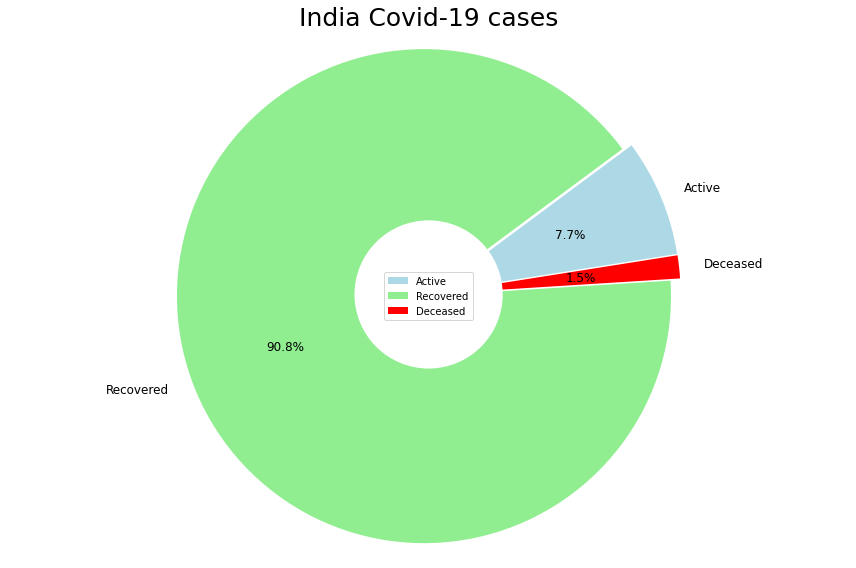

In [8]:
last_row=india_data.shape[0]-1
ind_act=india_data['Active'].iloc[last_row]
ind_rec=india_data['Recovered'].iloc[last_row]
ind_deat=india_data['Deceased'].iloc[last_row]
labels = ['Active','Recovered','Deceased']
sizes = [ind_act,ind_rec,ind_deat]
color= ['lightblue','lightgreen','red']
explode = []

for i in labels:
    explode.append(0.02)
    
plt.figure(figsize= (12,8))
plt.pie(sizes,labels=labels,startangle=9,autopct='%1.1f%%', explode =explode,colors = color,textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.30,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India Covid-19 cases',fontsize = 25)
plt.legend(labels, loc="center")
plt.axis('equal')  
plt.tight_layout()

### Statewise Comparison of Confirmed/Recovered/Deceased cases reported over time

> # Line Plot Comparison

In [9]:
fig=px.line(df,
              x='Date', y='Confirmed', color='State',
              title='India_Growth')
fig.update_layout(
    title="Number of Confirmed Cases over Time",
    xaxis_title="Since 01/2020",
    yaxis_title="No. of Cases",
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="RebeccaPurple"
    ),
    showlegend=False
)
fig.show()



In [10]:
fig=px.line(df,
              x='Date', y='Recovered', color='State',
              title='India_Growth')
fig.update_layout(
    title="Number of Recovered Cases over Time",
    xaxis_title="Since 01/2020",
    yaxis_title="No. of Cases",
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="RebeccaPurple"
    ),
    showlegend=False
)
fig.show()



In [11]:
fig=px.line(df,
              x='Date', y='Deceased', color='State',
              title='India_Growth')
fig.update_layout(
    title="Number of Deaths Reported over Time",
    xaxis_title="Since 01/2020",
    yaxis_title="No. of Cases",
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="RebeccaPurple"
    ),
    showlegend=False
)
fig.show()

> # Geospatial Comparison

In [12]:
#- change Jammu and Kashmir to Jammu & Kashmir TO CORRECTLY MAP THE GEOJSON DATA
#- change Andaman and Nicobar to Andaman & Nicobar TO CORRECTLY MAP THE GEOJSON DATA

df1.State[df1['State']=='Jammu and Kashmir']='Jammu & Kashmir'
df1.State[df1['State']=='Andaman and Nicobar Islands']='Andaman & Nicobar'

fig = px.choropleth(df1.sort_values('Confirmed',ascending=False), geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson", color="Confirmed",
                    locations="State",locationmode='geojson-id', featureidkey="properties.ST_NM",
                    hover_data=["Tested"],
                    color_continuous_scale='Oranges',
                    title='India: Total Confirmed Cases_State-Wise',
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=500,margin={"r":0,"t":30,"l":0,"b":30})
fig.show()

fig = px.choropleth(df1.sort_values('Active',ascending=False), geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson", color="Active",
                    locations="State",locationmode='geojson-id', featureidkey="properties.ST_NM",
                    hover_data=["Confirmed",'Active'],
                    color_continuous_scale='Blues',
                    title='India: Total Active Cases_State-Wise'
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=500,margin={"r":0,"t":30,"l":0,"b":30})
fig.show()

fig = px.choropleth(df1.sort_values('Recovered',ascending=False), geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson", color="Recovered",
                    locations="State",locationmode='geojson-id', featureidkey="properties.ST_NM",
                    hover_data=["Confirmed","Active","Recovered"],
                    color_continuous_scale='Greens',
                    title='India: Total Recovered Cases_State-Wise'
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=500,margin={"r":0,"t":30,"l":0,"b":30})
fig.show()

fig = px.choropleth(df1.sort_values('Deceased',ascending=False), geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson", color="Deceased",
                    locations="State",locationmode='geojson-id', featureidkey="properties.ST_NM",
                    hover_data=['Confirmed','Active','Recovered','Deceased'],
                    color_continuous_scale='Reds',
                    title='India: Total Death cases per state'
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=500,margin={"r":0,"t":30,"l":0,"b":30})
fig.show()



> # Bar Chart Comparison

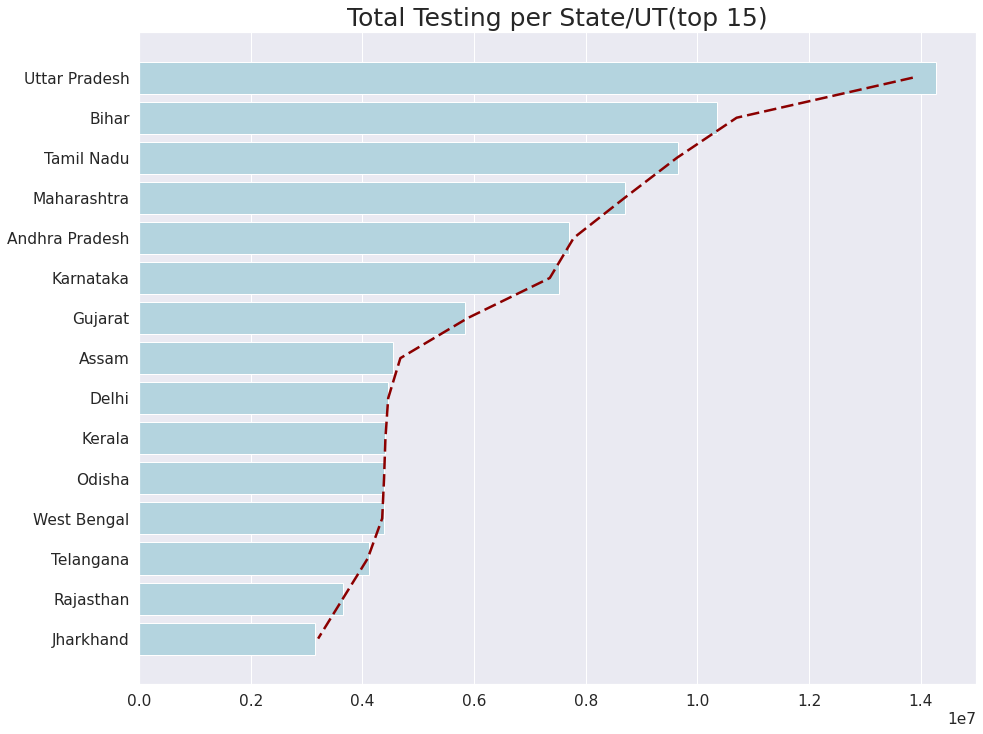

In [13]:
def plotHGraphs(x, y, title):
    sns.set(font_scale=1.4)
    ysmoothed = gaussian_filter1d(y, sigma=0.5)
    fig,ax=plt.subplots(figsize=(15, 12))
    sns.barplot(y,x,color='lightblue')
    plt.plot(ysmoothed,x,linestyle='dashed',color='darkred',dashes=(5,2),lw=2.5)
    ax.set_ylabel('')   
    ax.set_xlabel('')   
    plt.title(title, size=25)
    plt.show()


plotHGraphs(df1.sort_values('Tested',ascending=False).head(15)['State'],df1.sort_values('Tested',ascending=False).head(15)['Tested'],'Total Testing per State/UT(top 15)')   

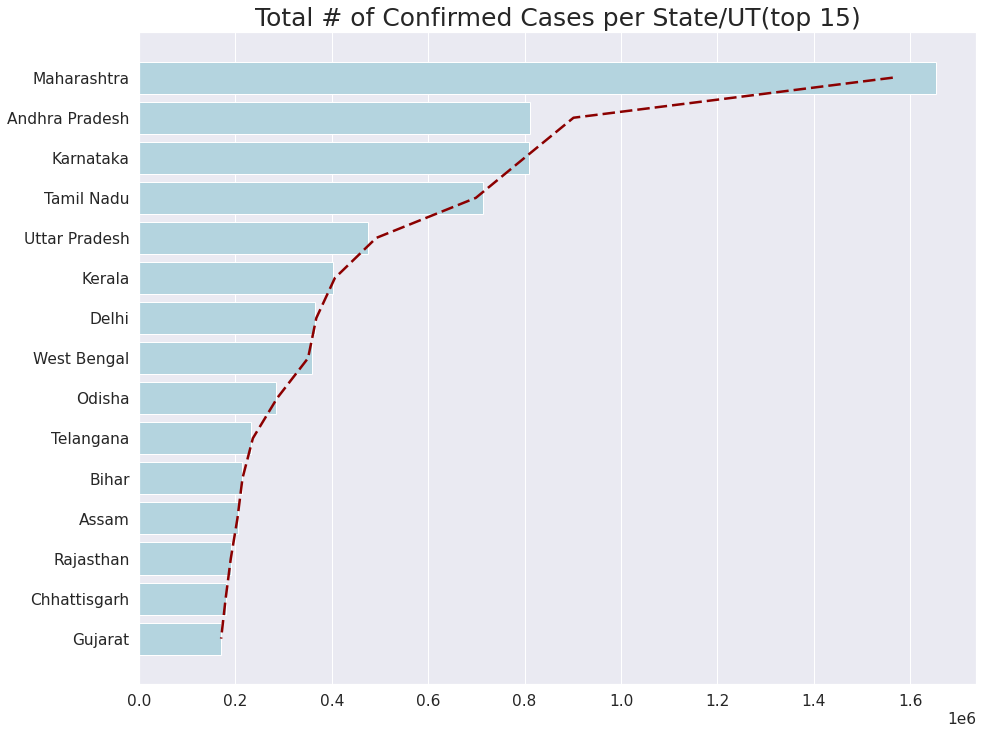

In [14]:
plotHGraphs(df1.sort_values('Confirmed',ascending=False).head(15)['State'],df1.sort_values('Confirmed',ascending=False).head(15)['Confirmed'],'Total # of Confirmed Cases per State/UT(top 15)')   

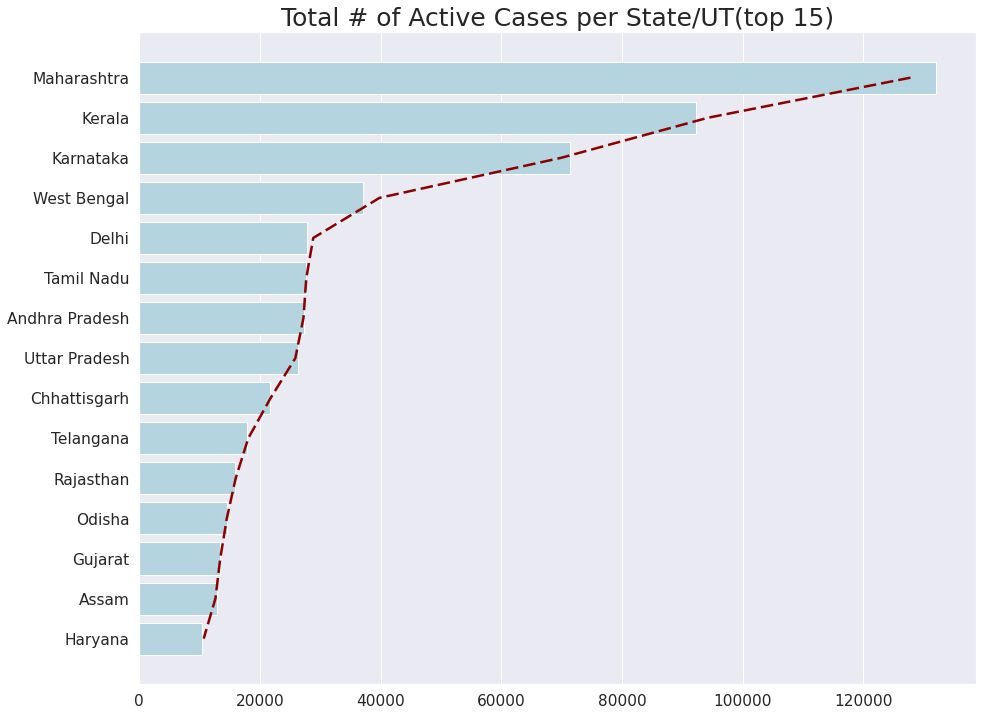

In [15]:
plotHGraphs(df1.sort_values('Active',ascending=False).head(15)['State'],df1.sort_values('Active',ascending=False).head(15)['Active'],'Total # of Active Cases per State/UT(top 15)')   

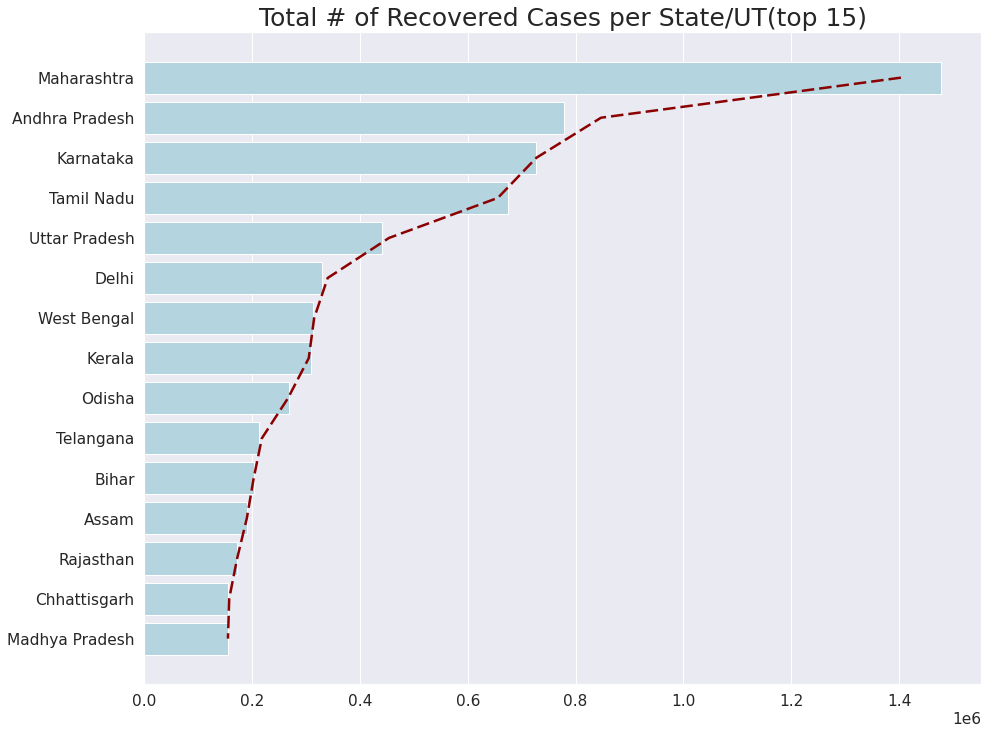

In [16]:
plotHGraphs(df1.sort_values('Recovered',ascending=False).head(15)['State'],df1.sort_values('Recovered',ascending=False).head(15)['Recovered'],'Total # of Recovered Cases per State/UT(top 15)')   

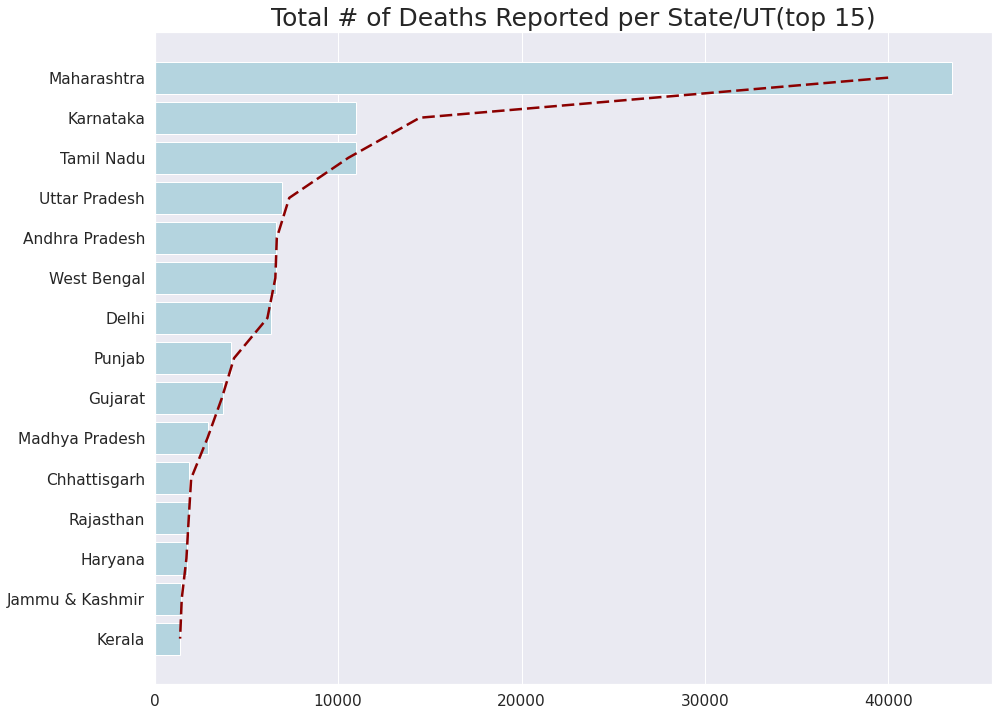

In [17]:
plotHGraphs(df1.sort_values('Deceased',ascending=False).head(15)['State'],df1.sort_values('Deceased',ascending=False).head(15)['Deceased'],'Total # of Deaths Reported per State/UT(top 15)')   

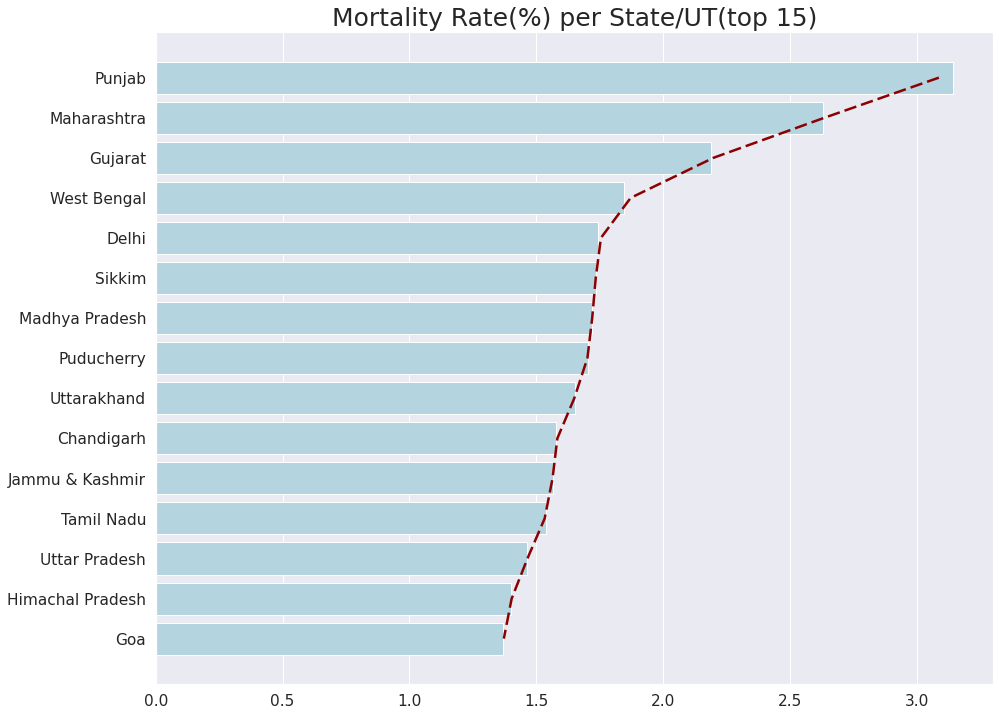

In [18]:
plotHGraphs(df1.sort_values('Mortality Rate(per 100)',ascending=False).head(15)['State'],df1.sort_values('Mortality Rate(per 100)',ascending=False).head(15)['Mortality Rate(per 100)'],'Mortality Rate(%) per State/UT(top 15)')   

In [19]:
def fill_unknown(x):
    d=x[0]
    s=x[1]
    if(d=='Unknown'):
        return s+"_"+"unknown"
    return d

district_wise['District']=district_wise[['District','State']].apply(fill_unknown,axis=1)

district_wise=district_wise[district_wise['State']!='State Unassigned']
#district_wise.head()

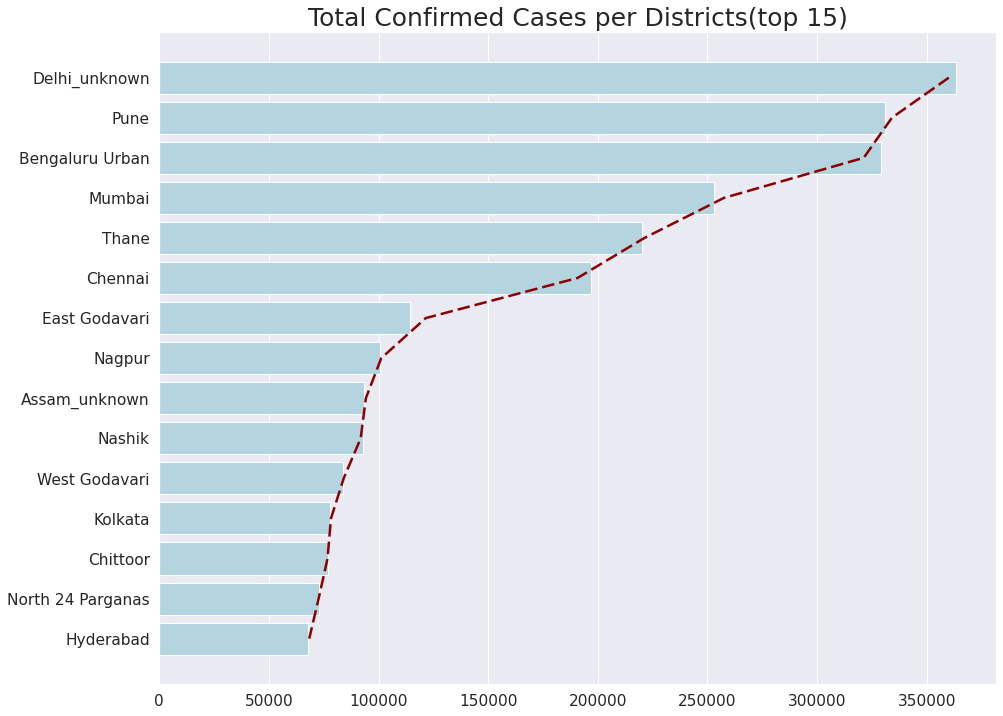

In [20]:
plotHGraphs(district_wise.sort_values('Confirmed',ascending=False).head(15)['District'],district_wise.sort_values('Confirmed',ascending=False).head(15)['Confirmed'],'Total Confirmed Cases per Districts(top 15)')   

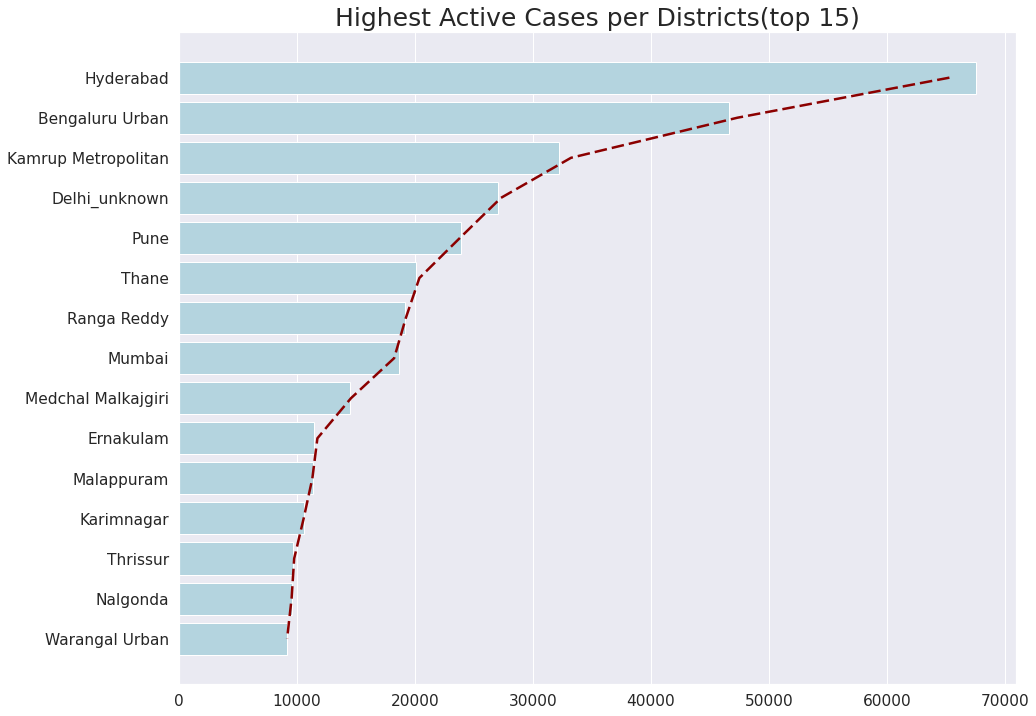

In [21]:
plotHGraphs(district_wise.sort_values('Active',ascending=False).head(15)['District'],district_wise.sort_values('Active',ascending=False).head(15)['Active'],'Highest Active Cases per Districts(top 15)')   

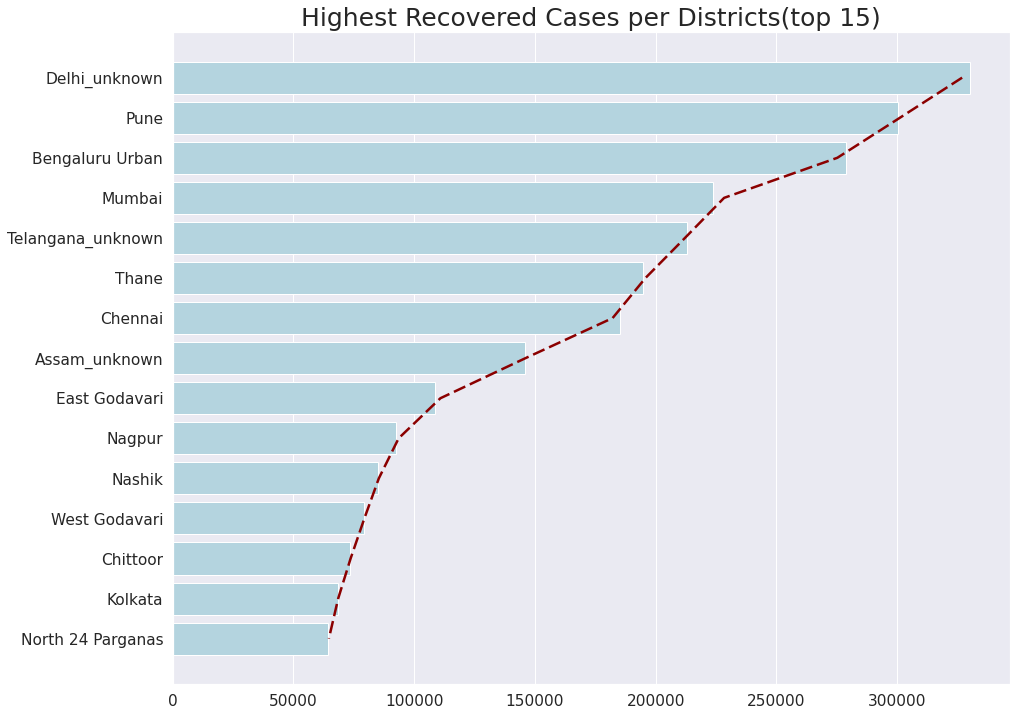

In [22]:
plotHGraphs(district_wise.sort_values('Recovered',ascending=False).head(15)['District'],district_wise.sort_values('Recovered',ascending=False).head(15)['Recovered'],'Highest Recovered Cases per Districts(top 15)')   

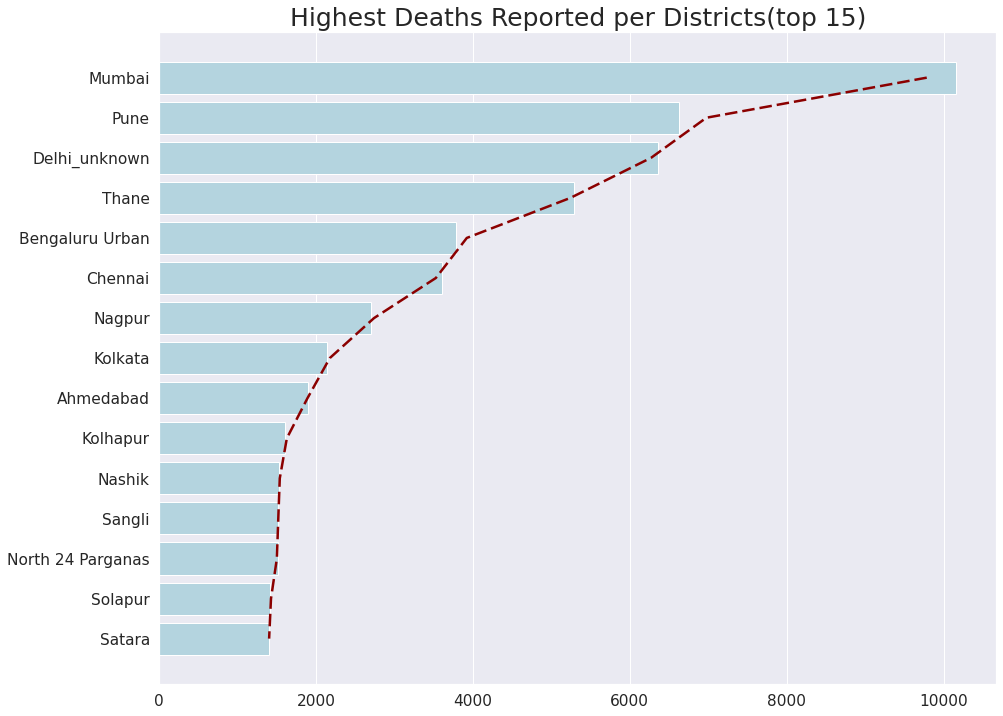

In [23]:
plotHGraphs(district_wise.sort_values('Deceased',ascending=False).head(15)['District'],district_wise.sort_values('Deceased',ascending=False).head(15)['Deceased'],'Highest Deaths Reported per Districts(top 15)')   

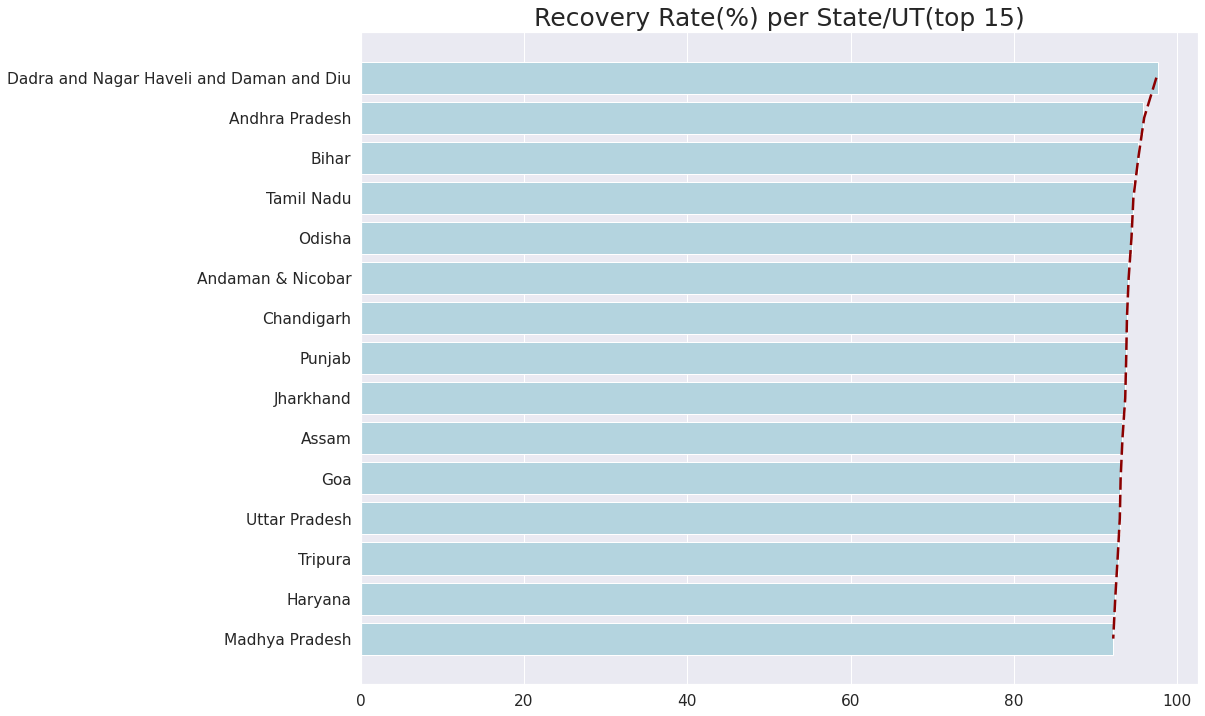

In [24]:
plotHGraphs(df1.sort_values('Recovery Rate(per 100)',ascending=False).head(15)['State'],df1.sort_values('Recovery Rate(per 100)',ascending=False).head(15)['Recovery Rate(per 100)'],'Recovery Rate(%) per State/UT(top 15)')   

> # Worst-Hit State Analysis

> ## 1. Confirmed Cases

In [25]:
df1.sort_values('Confirmed', ascending= False).set_index("State").drop(columns=['Date','Other','Tested']).head(1).style.set_properties(**{'background-color': 'orange', 
                           'color': 'white'})

,Confirmed,Recovered,Deceased,Active,Mortality Rate(per 100),Recovery Rate(per 100)
State,,,,,,
Maharashtra,1654028,1478496,43463,132069,2.627706,89.387604


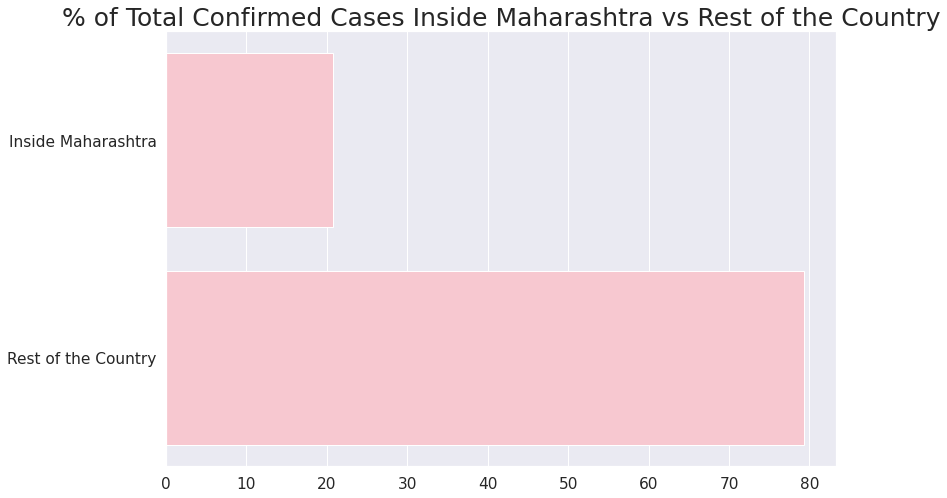

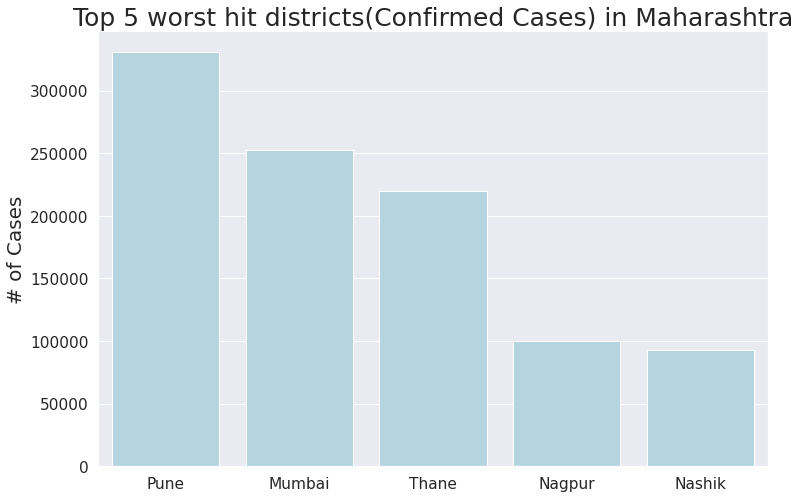

In [26]:
worst_hit_state=df1.sort_values('Confirmed',ascending=False)['State'].iloc[0]
whit_dsdf=district_wise[district_wise['State']==worst_hit_state]
whit_dsdf=whit_dsdf.sort_values('Confirmed',ascending=False)
#whit_dsdf.head()

country_total=india_data.sort_values('Confirmed').tail(1)['Confirmed'].iloc[0]
worststate_total=df1.sort_values('Confirmed',ascending=False)['Confirmed'].iloc[0]

inside_per=(worststate_total/country_total)*100
outside_per=100-inside_per

plt.figure(figsize=(12,8))
sns.barplot([inside_per,outside_per],['Inside '+worst_hit_state,'Rest of the Country'],color='pink')
plt.title("% of Total Confirmed Cases Inside "+worst_hit_state+" vs Rest of the Country" , size=25)
plt.show()

plt.figure(figsize=(12,8))
sns.barplot(whit_dsdf['District'].head(5),whit_dsdf['Confirmed'].head(5),color='lightblue')
plt.ylabel('# of Cases',size=20)   
plt.xlabel('')   
plt.title("Top 5 worst hit districts(Confirmed Cases) in "+worst_hit_state , size=25)
plt.show()



>  ## 2. Active Cases

In [27]:
df1.sort_values('Active', ascending= False).set_index("State").drop(columns=['Date','Other','Tested',]).head(1).style.set_properties(**{'background-color': 'orange', 
                           'color': 'white'})

,Confirmed,Recovered,Deceased,Active,Mortality Rate(per 100),Recovery Rate(per 100)
State,,,,,,
Maharashtra,1654028,1478496,43463,132069,2.627706,89.387604


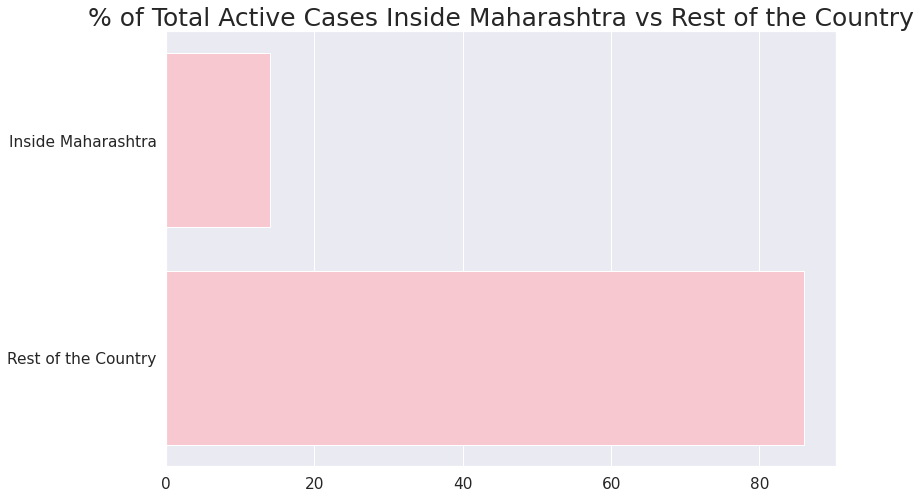

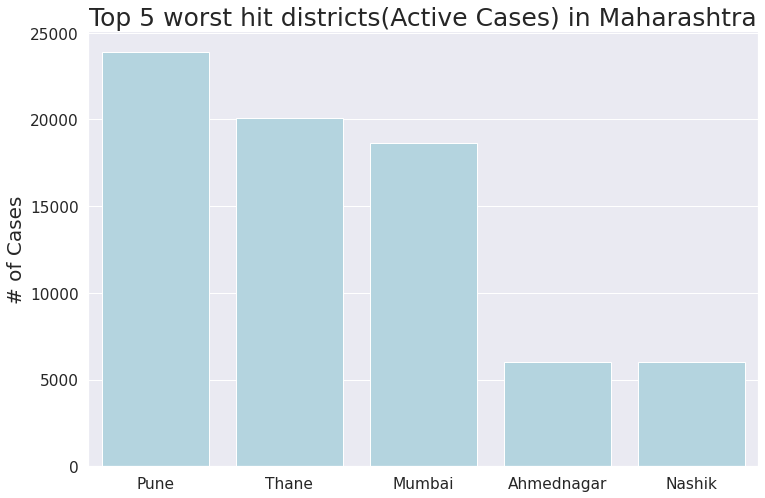

In [28]:
worst_hit_state=df1.sort_values('Active',ascending=False)['State'].iloc[0]
whit_dsdf=district_wise[district_wise['State']==worst_hit_state]
whit_dsdf=whit_dsdf.sort_values('Active',ascending=False)
#whit_dsdf.head()

country_total=india_data.sort_values('Active').tail(1)['Active'].iloc[0]
worststate_total=df1.sort_values('Active',ascending=False)['Active'].iloc[0]

inside_per=(worststate_total/country_total)*100
outside_per=100-inside_per

plt.figure(figsize=(12,8))
sns.barplot([inside_per,outside_per],['Inside '+worst_hit_state,'Rest of the Country'],color='pink')
plt.title("% of Total Active Cases Inside "+worst_hit_state+" vs Rest of the Country" , size=25)
plt.show()

plt.figure(figsize=(12,8))
sns.barplot(whit_dsdf['District'].head(5),whit_dsdf['Active'].head(5),color='lightblue')
plt.ylabel('# of Cases',size=20)   
plt.xlabel('')   
plt.title("Top 5 worst hit districts(Active Cases) in "+worst_hit_state , size=25)
plt.show()


> ## 3. Deaths Reported

In [29]:
df1.sort_values('Deceased', ascending= False).set_index("State").drop(columns=['Date','Other','Tested']).head(1).style.set_properties(**{'background-color': 'orange', 
                           'color': 'white'})

,Confirmed,Recovered,Deceased,Active,Mortality Rate(per 100),Recovery Rate(per 100)
State,,,,,,
Maharashtra,1654028,1478496,43463,132069,2.627706,89.387604


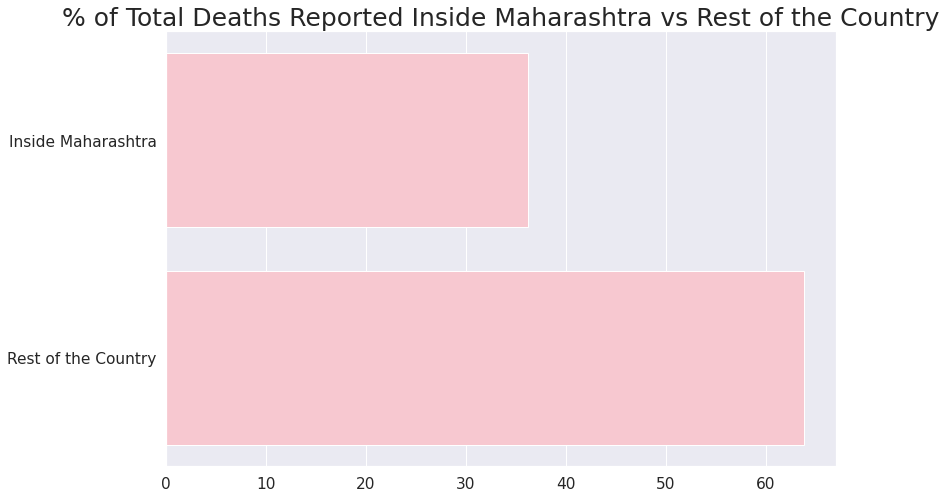

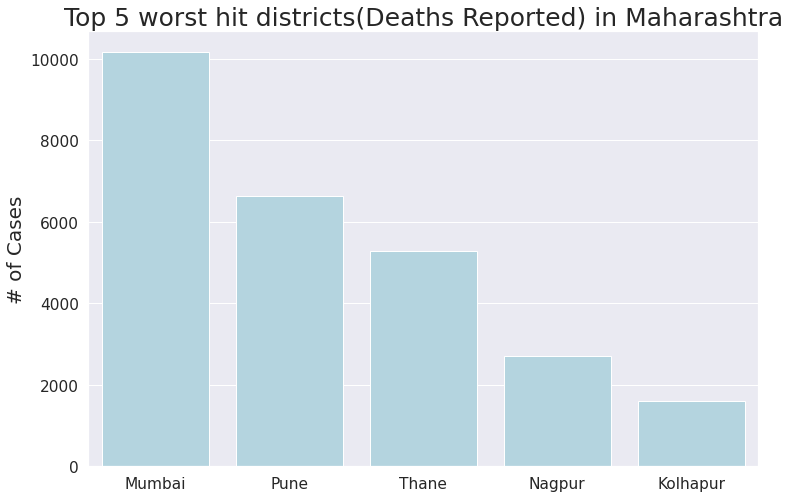

In [30]:
worst_hit_state=df1.sort_values('Deceased',ascending=False)['State'].iloc[0]
whit_dsdf=district_wise[district_wise['State']==worst_hit_state]
whit_dsdf=whit_dsdf.sort_values('Deceased',ascending=False)
#whit_dsdf.head()

country_total=india_data.sort_values('Deceased').tail(1)['Deceased'].iloc[0]
worststate_total=df1.sort_values('Deceased',ascending=False)['Deceased'].iloc[0]

inside_per=(worststate_total/country_total)*100
outside_per=100-inside_per

plt.figure(figsize=(12,8))
sns.barplot([inside_per,outside_per],['Inside '+worst_hit_state,'Rest of the Country'],color='pink')
plt.title("% of Total Deaths Reported Inside "+worst_hit_state+" vs Rest of the Country" , size=25)
plt.show()

plt.figure(figsize=(12,8))
sns.barplot(whit_dsdf['District'].head(5),whit_dsdf['Deceased'].head(5),color='lightblue')
plt.ylabel('# of Cases',size=20)   
plt.xlabel('')   
plt.title("Top 5 worst hit districts(Deaths Reported) in "+worst_hit_state , size=25)
plt.show()


> ## 4. Mortality Rate(per 100) 

In [31]:
df1.sort_values('Mortality Rate(per 100)', ascending= False).set_index("State").drop(columns=['Date','Other','Tested']).head(1).style.set_properties(**{'background-color': 'orange', 
                           'color': 'white'})

,Confirmed,Recovered,Deceased,Active,Mortality Rate(per 100),Recovery Rate(per 100)
State,,,,,,
Punjab,131737,123510,4138,4089,3.141107,93.754982


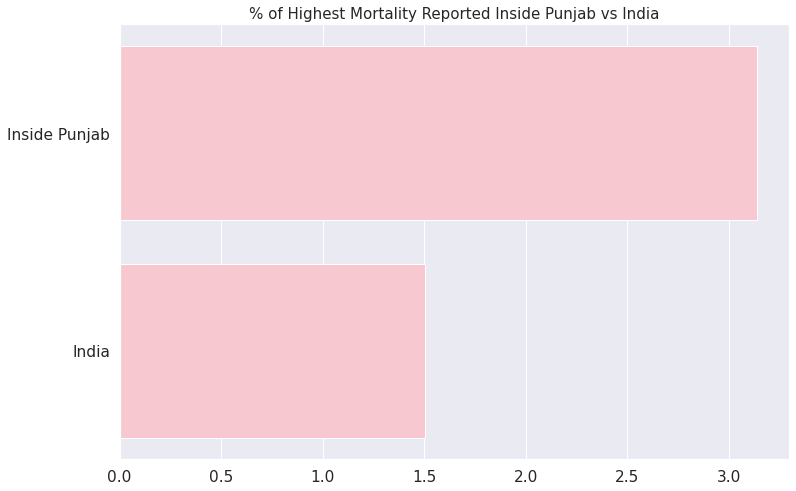

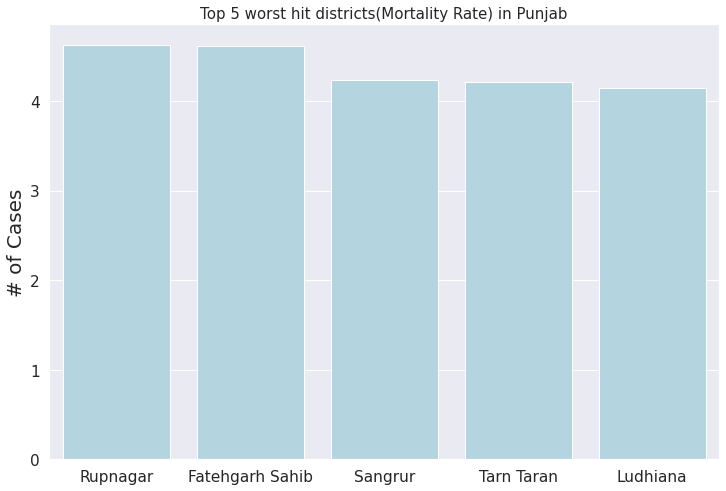

In [32]:
worst_hit_state=df1.sort_values('Mortality Rate(per 100)',ascending=False)['State'].iloc[0]
whit_dsdf=district_wise[district_wise['State']==worst_hit_state]
whit_dsdf['Mortality Rate(per 100)']=whit_dsdf[['Confirmed','Deceased']].apply(fill_mortality,axis=1)   
whit_dsdf=whit_dsdf.sort_values('Mortality Rate(per 100)',ascending=False)
#whit_dsdf.head()

country_total=india_data.sort_values('Confirmed').tail(1)['Mortality Rate(per 100)'].iloc[0]
worststate_total=df1.sort_values('Mortality Rate(per 100)',ascending=False)['Mortality Rate(per 100)'].iloc[0]

plt.figure(figsize=(12,8))
sns.barplot([worststate_total,country_total],['Inside '+worst_hit_state,'India'],color='pink')
plt.title("% of Highest Mortality Reported Inside "+worst_hit_state+" vs India" , size=15)
plt.show()

plt.figure(figsize=(12,8))
sns.barplot(whit_dsdf['District'].head(5),whit_dsdf['Mortality Rate(per 100)'].head(5),color='lightblue')
plt.ylabel('# of Cases',size=20)   
plt.xlabel('')   
plt.title("Top 5 worst hit districts(Mortality Rate) in "+worst_hit_state , size=15)
plt.show()

## Covid 19 State-Wise Tabulated Data

In [33]:
india_total=india_data.tail(1).set_index('State')
india_total.drop(columns=['Date','Other'],inplace=True)
df1.sort_values('Confirmed', ascending= False).set_index("State").drop(columns=['Date','Other','Tested']).style.background_gradient(cmap='Oranges',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deceased"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Reds',subset=["Mortality Rate(per 100)"])\
                        .background_gradient(cmap='Greens',subset=["Recovery Rate(per 100)"])



,Confirmed,Recovered,Deceased,Active,Mortality Rate(per 100),Recovery Rate(per 100)
State,,,,,,
Maharashtra,1654028,1478496,43463,132069,2.627706,89.387604
Andhra Pradesh,811825,777900,6625,27300,0.816063,95.821144
Karnataka,809638,727298,10991,71349,1.357520,89.830023
Tamil Nadu,714235,675518,10983,27734,1.537729,94.579235
Uttar Pradesh,474054,440847,6940,26267,1.463968,92.995102
Kerala,402675,309032,1377,92266,0.341963,76.744769
Delhi,364341,330112,6356,27873,1.744520,90.605230
West Bengal,357779,314003,6604,37172,1.845832,87.764514
Odisha,283942,268115,1325,14502,0.466645,94.425974


In [34]:
india_total.style.set_properties(**{'background-color': 'orange', 
                           'color': 'white'})

,Confirmed,Recovered,Deceased,Tested,Active,Mortality Rate(per 100),Recovery Rate(per 100)
State,,,,,,,
India,7988349,7256588,120034,104420894.000000,611727,1.502613,90.839647
